In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import weightedtau

In [4]:
source_order=['imagenet','radimagenet','medmnist','bloodmnist','breastmnist', 'chestmnist', 'dermamnist','octmnist','organamnist','organcmnist','organsmnist','pathmnist','pneumoniamnist','retinamnist','tissuemnist']
target_order=['bloodmnist','breastmnist', 'dermamnist','octmnist','organamnist','organcmnist','organsmnist','pathmnist','pneumoniamnist','retinamnist','tissuemnist']
resnet_results = pd.DataFrame({'source': source_order})
for target in target_order:
    df = pd.read_csv('/home/doju/projects/similarity/finetuned_AUCs/fined_' + target.removesuffix('mnist') + '.csv')
    df = df[["source_flag","target_flag","batch_size","lr","momentum","wd","stopped_at","test_auc","val_loss"]]
    result = df.loc[df.groupby('source_flag')['val_loss'].idxmin()]
    result.loc[len(result)] = [target,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
    result['total_count'] = df.groupby('source_flag')['source_flag'].transform('count').loc[result.index]
    result['source_flag'] = pd.Categorical(result['source_flag'], categories=source_order, ordered=True)
    result = result.sort_values('source_flag')
    #print(result.to_string(index=False))
    resnet_results[target] = (result['test_auc']).to_numpy()
print(resnet_results.to_latex(index=False, formatters={"name": str.upper},float_format="{:.2f}".format,))  

\begin{tabular}{lrrrrrrrrrrr}
\toprule
source & bloodmnist & breastmnist & dermamnist & octmnist & organamnist & organcmnist & organsmnist & pathmnist & pneumoniamnist & retinamnist & tissuemnist \\
\midrule
imagenet & 1.00 & 0.89 & 0.89 & 0.93 & 0.99 & 0.98 & 0.96 & 0.99 & 0.98 & 0.86 & 0.84 \\
radimagenet & 1.00 & 0.84 & 0.87 & 0.97 & 0.99 & 0.98 & 0.95 & 0.99 & 0.98 & 0.78 & 0.83 \\
medmnist & 1.00 & 0.85 & 0.88 & 0.95 & 0.98 & 0.98 & 0.95 & 0.98 & 0.98 & 0.80 & 0.84 \\
bloodmnist & NaN & 0.76 & 0.85 & 0.90 & 0.99 & 0.98 & 0.95 & 0.97 & 0.87 & 0.69 & 0.80 \\
breastmnist & 0.99 & NaN & 0.86 & 0.88 & 0.99 & 0.98 & 0.95 & 0.96 & 0.93 & 0.70 & 0.80 \\
chestmnist & 0.99 & 0.86 & 0.88 & 0.94 & 0.98 & 0.98 & 0.96 & 0.97 & 0.93 & 0.79 & 0.81 \\
dermamnist & 0.99 & 0.86 & NaN & 0.87 & 0.99 & 0.98 & 0.95 & 0.98 & 0.85 & 0.71 & 0.81 \\
octmnist & 0.99 & 0.83 & 0.88 & NaN & 0.98 & 0.98 & 0.94 & 0.98 & 0.94 & 0.70 & 0.80 \\
organamnist & 0.99 & 0.80 & 0.86 & 0.96 & NaN & 0.99 & 0.96 & 0.97 & 0.9

In [8]:
source_order=['densenet','efficientnet','googlenet','mnasnet','mobilenet', 'vgg', 'convnext','shufflenet','resnet']
target_order=['bloodmnist','breastmnist', 'dermamnist','octmnist','organamnist','organcmnist','organsmnist','pathmnist','pneumoniamnist','retinamnist','tissuemnist']
results = pd.DataFrame({'source': source_order})
for target in target_order:
    t = target.removesuffix('mnist')
    df = pd.read_csv('./finetuned_AUCs/fined_' + t + '_imnet.csv')
    df = df[["source_flag","target_flag","batch_size","lr","momentum","wd","stopped_at","test_auc","val_loss"]]
    result = df.loc[df.groupby('source_flag')['val_loss'].idxmin()]
    result = result.reset_index()
    result.loc[len(result)] = ['','resnet', '','','','','','',resnet_results.loc[0][target],'']
    result['total_count'] = df.groupby('source_flag')['source_flag'].transform('count').loc[result.index]
    result['source_flag'] = pd.Categorical(result['source_flag'], categories=source_order, ordered=True)
    result = result.sort_values('source_flag')
    results[target] = (result['test_auc']*100).to_numpy()
results
#print(results.to_latex(index=False, formatters={"name": str.upper},float_format="{:.2f}".format,))

,source,bloodmnist,breastmnist,dermamnist,octmnist,organamnist,organcmnist,organsmnist,pathmnist,pneumoniamnist,retinamnist,tissuemnist
0,densenet,99.902266,90.142022,87.702482,98.179467,99.046628,98.636570,95.510318,99.024048,98.727811,87.814683,84.339509
1,efficientnet,99.924477,88.596491,91.145089,99.026400,99.290031,98.556977,95.601591,98.738552,97.936664,87.222403,84.212875
2,googlenet,99.765735,88.178780,88.784200,96.437333,99.151255,98.391771,95.643033,99.373958,98.937103,83.422995,84.214894
3,mnasnet,99.533576,85.860485,77.091300,93.788400,95.882056,94.125459,90.061046,98.784152,89.207210,80.854287,78.305050
4,mobilenet,99.815469,88.721805,89.442080,94.639133,98.862497,98.737047,94.390348,99.301349,97.901600,84.206075,83.692674
5,vgg,99.688631,86.340852,90.301909,98.033867,99.301017,98.926719,96.435265,98.877483,98.425378,87.728667,85.086352
6,convnext,99.911596,91.583124,92.933082,98.860933,99.266513,98.870335,96.378173,99.468749,97.965155,87.553228,85.295162
7,shufflenet,99.744416,84.816207,89.154569,97.170933,98.944277,98.651914,96.023110,99.369138,98.047337,80.522493,83.653223
8,resnet,99.845338,88.512949,89.464540,92.583933,99.040924,98.087965,95.582145,98.965528,98.345387,86.408163,84.488060


In [9]:
for target in target_order:
    print(target, (np.max(results[target])-np.min(results[target]))/100)

bloodmnist 0.003909005904105101
breastmnist 0.06766917293233078
dermamnist 0.1584178198106028
octmnist 0.0644246666666669
organamnist 0.03418961730204117
organcmnist 0.04801260525190088
organsmnist 0.06374219423262431
pathmnist 0.007301963022020601
pneumoniamnist 0.09729892614508003
retinamnist 0.07292189866268017
tissuemnist 0.06990112315406705


In [11]:
logme_df = pd.read_csv('./results/logme_model.csv')
leep_df = pd.read_csv('./results/leep_model.csv')
sfda_df =pd.read_csv('./results/sfda_model.csv')
parc_df = pd.read_csv('./results/parc_model.csv')
ncti_df = pd.read_csv('./results/ncti_model.csv')
nleep_df = pd.read_csv('./results/nleep_model.csv')

In [12]:
new_leep = pd.DataFrame({'source': source_order})
for target in target_order:
    new_leep[target] = 1- leep_df[target]
new_leep

,source,bloodmnist,breastmnist,dermamnist,octmnist,organamnist,organcmnist,organsmnist,pathmnist,pneumoniamnist,retinamnist,tissuemnist
0,densenet,2.638586,1.521193,2.032413,2.011882,2.601605,2.746124,2.674117,2.511712,1.449331,2.286935,2.675593
1,efficientnet,2.779950,1.513225,2.031434,1.997612,2.691954,2.769297,2.697486,2.666393,1.471949,2.317419,2.662530
2,googlenet,2.740592,1.527983,2.012617,1.984700,2.739077,2.828597,2.760674,2.438486,1.486805,2.348987,2.718280
3,mnasnet,2.682415,1.519608,2.049515,1.873312,2.587910,2.781796,2.665257,2.613764,1.456757,2.304018,2.709214
4,mobilenet,2.567626,1.516978,1.986241,1.927083,2.646061,2.821254,2.736923,2.565802,1.433045,2.281827,2.633054
5,vgg,2.714174,1.534583,2.056271,1.951844,2.727637,2.771329,2.719340,2.676935,1.479457,2.316296,2.717811
6,convnext,2.889868,1.535405,2.067017,2.029583,2.823099,2.960692,2.833660,2.728142,1.497301,2.354066,2.714332
7,shufflenet,2.567554,1.520023,1.991477,1.976377,2.546049,2.563216,2.627841,2.573661,1.380670,2.323596,2.700230
8,resnet,2.788741,1.537230,2.035212,2.003092,2.647924,2.775624,2.714704,2.550348,1.460599,2.312458,2.717964


In [13]:
new_ncti = pd.DataFrame({'source': source_order})
for target in target_order:
    new_ncti[target] = 1- ncti_df[target]
new_ncti

,source,bloodmnist,breastmnist,dermamnist,octmnist,organamnist,organcmnist,organsmnist,pathmnist,pneumoniamnist,retinamnist,tissuemnist
0,densenet,-0.767064,0.185897,0.032001,-0.628226,-0.699086,-0.492532,-0.682701,-0.552954,-0.018269,-0.312241,-0.418819
1,efficientnet,-0.414918,-0.105826,-0.388585,0.425656,0.000000,-0.056472,0.130800,-0.357869,-0.026524,-0.332784,-0.421924
2,googlenet,-0.499081,-0.186393,0.349512,-0.398827,-0.689402,-0.584359,-0.667656,-0.821199,-0.406532,0.515144,-0.794915
3,mnasnet,-0.988067,-0.191916,-0.298443,-1.000000,-0.892048,-0.757978,-0.816835,-0.419217,-0.873317,-0.492713,-1.033725
4,mobilenet,-0.963211,0.051570,-0.744874,-0.476460,-0.994632,-0.752895,-0.512056,-0.395593,-0.535724,-0.345696,-1.319495
5,vgg,-0.474814,-0.475277,-0.017026,-0.291555,-1.020347,-0.637855,-0.738685,-0.729552,-0.699713,-0.132297,-0.578696
6,convnext,-0.844127,0.003414,-0.229871,-0.652141,-0.944118,-1.053723,-0.990359,-1.000000,-0.317925,-0.488609,-0.951888
7,shufflenet,-1.000000,-1.000000,-1.000000,-0.624910,-0.457997,0.035417,-0.032007,-0.320036,-1.000000,-1.000000,0.000000
8,resnet,-0.063327,-0.271989,0.478142,-0.525985,-0.896858,-0.656372,-0.546812,0.055295,-0.718598,-0.061456,-0.381136


In [14]:
new_parc = pd.DataFrame({'source': source_order})
for target in target_order:
    new_parc[target] = 1- parc_df[target]
new_parc

,source,bloodmnist,breastmnist,dermamnist,octmnist,organamnist,organcmnist,organsmnist,pathmnist,pneumoniamnist,retinamnist,tissuemnist
0,densenet,-24.273040,-2.948656,-4.220817,-11.678418,-22.653681,-19.044706,-14.884183,-24.488735,-6.709344,-5.564178,-5.414817
1,efficientnet,-20.811835,-2.446461,-4.087414,-9.562988,-21.210066,-16.231663,-13.152548,-22.716777,-7.066682,-5.562847,-5.293459
2,googlenet,-23.259563,-2.319958,-4.192926,-11.117347,-22.381789,-18.125181,-15.213000,-23.962303,-7.106037,-4.686293,-6.035581
3,mnasnet,-23.669312,-3.137300,-3.955729,-13.797813,-23.664938,-18.494737,-15.730236,-23.746757,-7.131640,-5.636821,-6.302949
4,mobilenet,-22.434288,-3.706458,-6.570315,-10.891488,-22.579853,-18.226412,-14.451599,-23.650298,-7.189854,-5.829058,-5.634231
5,vgg,-19.718749,-3.190329,-4.069058,-11.928099,-21.843425,-18.220393,-13.627094,-22.789454,-8.461763,-5.764136,-5.303651
6,convnext,-23.935658,-3.887366,-3.550880,-11.582062,-23.589592,-18.443519,-15.168441,-25.456652,-7.931012,-6.159442,-6.018672
7,shufflenet,-24.560164,-4.033637,-5.091236,-11.915878,-24.022535,-19.433332,-15.832398,-25.092254,-7.549236,-5.407433,-5.735034
8,resnet,-20.666023,-2.938746,-3.763639,-12.069671,-23.763720,-18.850367,-16.408291,-23.385469,-7.011263,-4.617274,-4.978033


In [15]:
new_logme = pd.DataFrame({'source': source_order})
for target in target_order:
    new_logme[target] = 1- logme_df[target]
new_logme

,source,bloodmnist,breastmnist,dermamnist,octmnist,organamnist,organcmnist,organsmnist,pathmnist,pneumoniamnist,retinamnist,tissuemnist
0,densenet,-0.281940,-12.420726,-1.485685,-5.282625,0.623256,0.744203,0.830232,0.066173,-12.974679,-2.893325,-0.115579
1,efficientnet,-1.177486,-13.612140,-2.607103,-6.893340,0.032441,0.143141,0.180413,-0.835780,-14.952141,-3.946021,-1.272732
2,googlenet,-0.096006,-10.444964,-1.261118,-4.189599,0.608357,0.718150,0.803684,0.120869,-11.608803,-2.264552,0.073272
3,mnasnet,-1.205742,-14.640527,-2.870715,-6.643198,-0.040091,0.096542,0.170801,-0.836797,-14.829327,-4.132726,-0.963016
4,mobilenet,-0.286166,-11.263689,-1.279030,-4.520358,0.572123,0.715061,0.792784,0.155512,-13.119678,-2.489499,-0.023108
5,vgg,-14.877181,-60.279196,-21.483455,-32.849179,-11.016444,-10.848948,-10.791634,-13.731547,-67.367678,-25.613837,-14.752245
6,convnext,0.747593,-7.191016,0.340002,-2.195320,0.576169,0.699342,0.784276,0.568890,-8.173277,-0.582469,1.075358
7,shufflenet,0.585926,0.846538,-0.043342,0.324321,0.474832,0.611783,0.746138,0.555342,0.922716,0.667159,0.861003
8,resnet,0.905270,-3.658816,0.751786,0.014058,0.599297,0.709465,0.818949,0.731164,-4.155366,1.222008,1.088998


In [16]:
new_nleep = pd.DataFrame({'source': source_order})
for target in target_order:
    new_nleep[target] = 1- nleep_df[target]
new_nleep

,source,bloodmnist,breastmnist,dermamnist,octmnist,organamnist,organcmnist,organsmnist,pathmnist,pneumoniamnist,retinamnist,tissuemnist
0,densenet,0.428404,0.247577,0.416848,0.307035,0.295531,0.369381,0.430752,0.250710,0.189353,0.564580,0.630593
1,efficientnet,0.443023,0.319387,0.421388,0.400518,0.373223,0.443333,0.497890,0.351502,0.237230,0.564341,0.660966
2,googlenet,0.374780,0.307351,0.415339,0.316551,0.266887,0.320385,0.417691,0.237405,0.160670,0.577213,0.637005
3,mnasnet,0.362788,0.276306,0.406786,0.277659,0.270129,0.366010,0.423181,0.250261,0.105776,0.545746,0.636351
4,mobilenet,0.410523,0.313153,0.399922,0.331645,0.277321,0.378000,0.436827,0.313658,0.149111,0.567033,0.633572
5,vgg,0.437597,0.326916,0.421168,0.367939,0.279958,0.340856,0.431951,0.259482,0.148262,0.551486,0.650699
6,convnext,0.369633,0.324657,0.414825,0.356642,0.278935,0.394986,0.432321,0.206993,0.162354,0.549568,0.628794
7,shufflenet,0.311045,0.249895,0.376012,0.345584,0.228774,0.337122,0.412541,0.297365,0.141210,0.556043,0.620954
8,resnet,0.455867,0.295517,0.419299,0.325001,0.237581,0.350725,0.438095,0.270049,0.157461,0.571645,0.646793


In [17]:
perf = pd.read_csv('./results/lp_model.csv')
grads = pd.read_csv('./results/fu_model.csv')
combined_our = pd.DataFrame({'source': source_order})
updated_perf = pd.DataFrame({'source': source_order})
updated_grads = pd.DataFrame({'source': source_order})
for target in target_order:
    updated_perf[target] = (perf[target]-np.max(perf[target])) / (np.min(perf[target])-np.max(perf[target]))
    updated_grads[target] = (grads[target]-np.max(grads[target])) / (np.min(grads[target])-np.max(grads[target]))
    combined_our[target] = updated_perf[target] * updated_grads[target]
combined_our

,source,bloodmnist,breastmnist,dermamnist,octmnist,organamnist,organcmnist,organsmnist,pathmnist,pneumoniamnist,retinamnist,tissuemnist
0,densenet,0.455718,0.806547,0.754400,0.630880,0.695635,0.557138,0.485000,0.586517,0.771405,0.868464,0.835550
1,efficientnet,0.445758,0.508896,0.277955,0.302429,0.649124,0.874195,0.423116,0.488881,0.728418,0.220581,0.774658
2,googlenet,0.210395,0.465529,0.094314,0.315952,0.259548,0.315232,0.107802,0.314127,0.439153,-0.000000,0.175935
3,mnasnet,0.118440,0.232197,0.100380,0.248808,0.249165,0.265908,0.065607,0.078898,0.376310,0.165641,0.165737
4,mobilenet,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000
5,vgg,0.820004,0.850086,0.855798,0.844188,0.882865,0.818827,0.848137,0.687480,0.932354,0.854829,0.904069
6,convnext,0.363451,0.590772,0.528615,0.531032,0.420786,0.545477,0.232033,0.160825,0.715265,0.374271,0.313565
7,shufflenet,0.219595,-0.000000,0.304167,-0.000000,-0.000000,0.041367,0.100503,-0.000000,-0.000000,0.377119,0.581994
8,resnet,0.585934,0.523628,0.641100,0.356974,0.424260,0.522010,0.334619,0.576104,0.764156,0.416896,0.338694


In [18]:
ktau_df = pd.DataFrame({'target': target_order})
k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': logme_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['logme'] = k_tau

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': sfda_df[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['sfda'] = k_tau

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': new_leep[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['leep'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': new_parc[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['parc'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': new_ncti[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['ncti'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': new_nleep[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['nleep'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': combined_our[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['our'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': updated_perf[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['perf'] = k_tau
ktau_df

k_tau = []
for i, target_flag  in enumerate(target_order):
    joined_df = pd.DataFrame({'source': results['source'], 'score': updated_grads[target_flag], 'auc': results[target_flag]})
    joined_df = joined_df[joined_df['source']!=target_flag]
    tw_metric, _ = weightedtau(joined_df['score'], joined_df['auc'])
    k_tau.append(tw_metric)
ktau_df['grads'] = k_tau
#print(ktau_df[['target', 'logme', 'parc', 'sfda', 'ncti', 'leep', 'nleep', 'our']].to_latex(index=False, formatters={"name": str.upper},float_format="{:.2f}".format,))  
ktau_df.to_csv('ktau_imnet.csv')
ktau_df

,target,logme,sfda,leep,parc,ncti,nleep,our,perf,grads
0,bloodmnist,-0.203377,0.277793,0.483202,-0.009153,0.317857,0.349733,-0.004313,0.111411,0.158280
1,breastmnist,-0.229362,0.399208,0.217667,-0.175445,0.694961,0.167590,0.215831,0.117022,0.061018
2,dermamnist,-0.151932,0.232702,0.454499,0.462705,-0.008697,0.384153,0.194084,0.238270,0.189262
3,octmnist,0.262484,0.158769,0.441822,0.512554,0.376999,0.657175,0.114077,0.166047,0.195890
4,organamnist,0.359640,0.329108,0.526634,0.603100,-0.000281,0.517131,0.697671,0.735482,0.041450
5,organcmnist,0.293151,0.115727,0.103486,0.088371,0.006575,0.037067,0.191629,0.101785,0.284787
6,organsmnist,0.394761,0.044022,0.349769,0.206621,-0.140342,-0.056547,0.418607,0.448836,0.407350
7,pathmnist,-0.501841,0.093174,0.143621,-0.752770,-0.391412,-0.507592,-0.297531,-0.503156,0.475207
8,pneumoniamnist,-0.079149,0.158769,0.249404,0.281070,0.288680,0.119810,0.323138,0.093526,0.144024
9,retinamnist,0.285787,0.399208,-0.089599,-0.179548,0.092930,-0.123755,0.697589,0.602925,0.092474


In [22]:
from scipy import stats
import scikit_posthocs as sp

In [20]:
rank = pd.read_csv('./results/ktau_model_rank.csv', sep=';')
rank

,Unnamed: 0,target,logme,sfda,leep,parc,ncti,nleep,our
0,0,bloodmnist,7,4,1,6,3,2,5
1,1,breastmnist,7,2,3,6,1,5,4
2,2,dermamnist,6,4,2,1,7,3,5
3,3,octmnist,5,6,3,2,4,1,7
4,4,organamnist,5,6,3,2,7,4,1
5,5,organcmnist,1,3,4,5,7,6,2
6,6,organsmnist,2,5,3,4,7,6,1
7,7,pathmnist,5,2,1,7,4,6,3
8,8,pneumoniamnist,7,5,4,3,2,6,1
9,9,retinamnist,3,2,5,7,4,6,1


In [23]:
stats.friedmanchisquare(rank['logme'], rank['parc'], rank['sfda'], rank['ncti'], rank['leep'], rank['nleep'], rank['our'])

FriedmanchisquareResult(statistic=10.285714285714278, pvalue=0.11312423466719)

/tmp/ipykernel_3927767/923874771.py:8: UserWarning: The palette list has more values (20) than needed (3), which may not be intended.
  sns.barplot(df_long, x="tau", y="target", hue="method",saturation=0.5, palette=sns.color_palette("tab20"))


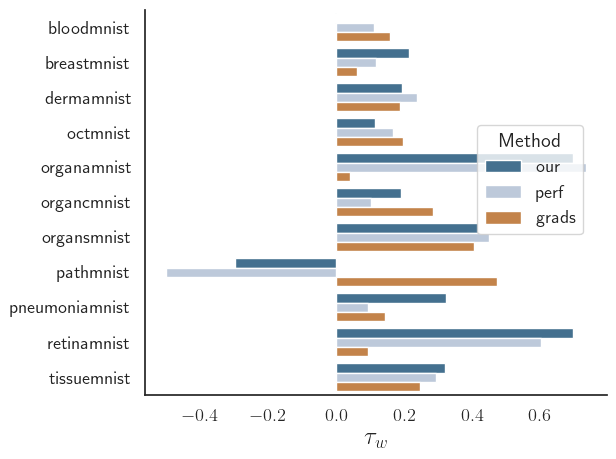

In [30]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Cambria"
})
sns.set(font_scale=1.2)
sns.set_style("white")
df_long = ktau_df[['target','our', 'perf', 'grads']].melt(id_vars='target', var_name='method', value_name='tau')
sns.barplot(df_long, x="tau", y="target", hue="method",saturation=0.5, palette=sns.color_palette("tab20"))
plt.title(r"$\tau_w$", y=-0.15, fontsize = 18)
plt.legend(bbox_to_anchor=(0.72, 0.7), loc='upper left', borderaxespad=0, title='Method')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.savefig('./results/ablation_model.pdf')
